In [72]:
import numpy as np
import pandas as pd
from pymongo import MongoClient
import pymongo
from pprint import pprint 

In [73]:
# plot settings
import matplotlib.pyplot as plt

FIGSIZE_TWOCOL = (10,4)
FIGSIZE_ONECOL = (5,4)

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size= MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize= MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize= MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [74]:
df=pd.read_csv('hubs.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

   degree        id         C        cc  in_degree  out_degree
0   19065    807095  0.002633  0.417001      19064           9
1   14637   1652541  0.003601  0.510699      14629          47
2   13144   2467791  0.004233  0.440488      13129          56
3   12217  87818409  0.004283  0.434341      12200          54
4   10752    816653  0.002871  0.459824      10744          29

In [75]:
CLIENT = MongoClient()
DB = CLIENT['social_database_test']
db = CLIENT.social_database_test

In [76]:
tweets = db.merged_03_17_25

In [77]:
names=[]
screen_names = []
followers = []
friends = []
for i in range(df.shape[0]):
    for userid in tweets.find( {"id":int (df['id'][i])}):
        names.append( userid['name'] )
        screen_names.append( '@'+userid['screen_name'] )
        followers.append(userid['followers_count'])
        friends.append(userid['friends_count'])

print names[:10]
print screen_names[:10]

[u'The New York Times', u'Reuters Top News', u'Washington Post', u'The Guardian', u'TechCrunch', u'TIME', u'HuffPost', u'Forbes', u'The Onion', u'BBC News (UK)']
[u'@nytimes', u'@Reuters', u'@washingtonpost', u'@guardian', u'@TechCrunch', u'@TIME', u'@HuffPost', u'@Forbes', u'@TheOnion', u'@BBCNews']


In [78]:
tweets.find_one()

{u'_id': ObjectId('5b17c2a5e4721c6552885fd1'),
 u'created_at': u'Mon Mar 12 23:09:05 +0000 2007',
 u'day': 19,
 u'favorite_count': 24,
 u'favourites_count': 7502,
 u'followers_count': 31333,
 u'friends_count': 9491,
 u'hashtags': [u'deletefacebook'],
 u'hour': 22,
 u'id': 1051731,
 u'lang': u'en',
 u'name': u'David Berkowitz',
 u'retweets': 0,
 u'screen_name': u'dberkowitz',
 u'statuses_count': 18904,
 u'tweet_created_at': u'Mon Mar 19 22:34:59 +0000 2018',
 u'tweets': 4}

In [79]:
df['name'] = names
df['screen_name'] = screen_names
df['followers'] = followers
df['friends'] = friends

In [80]:
df = df.sort_values('in_degree', ascending=False)

In [81]:
df['Interest'] = df['in_degree']/df['followers']
df['LogInterest'] = np.log10(df['in_degree'])/np.log10(df['followers'])

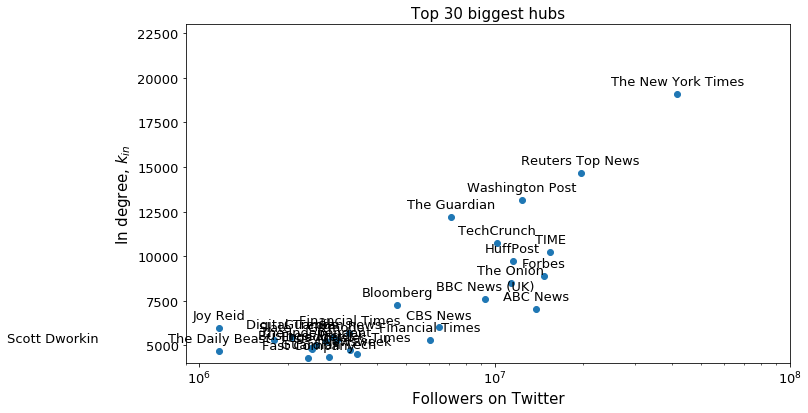

In [163]:
fig,ax = plt.subplots(figsize = (10,6))
n = 30
plt.plot(df['followers'][:n], df['degree'][:n], 'o')
for i in range(n):
    plt.text(df['followers'][i],df['degree'][i]+500, str(df['name'][i]),ha ='center', fontsize =13)

plt.xlabel('Followers on Twitter')
plt.ylabel('In degree, $k_{in}$')
plt.title('Top {} biggest hubs'.format(n))
plt.xlim(10**6-100000, 10**8)    
plt.ylim(4*10**3, 2*10**4+3000)
ax.set_xscale('log')
#plt.loglog()
plt.tight_layout()
plt.savefig('./imgs/hubs_followers.pdf', format='pdf')

In [164]:
df_interest = df.sort_values('in_degree',ascending=False).iloc[:n]
df_interest = df_interest.sort_values('Interest')

In [165]:
lab_screen =df_interest['screen_name'][:n]
lab =df_interest['name'][:n]
lab = lab+" "+lab_screen
nums = range(n,0,-1)
lab = [ l+", "+str(nums[i])   for i,l in enumerate(lab) ]

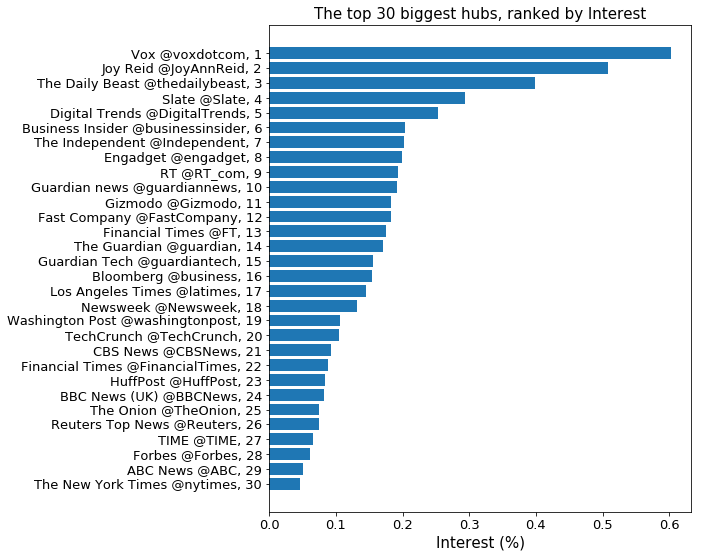

In [166]:
plt.subplots(figsize=(10,8))
X=df_interest['Interest'][:n]*100
#X=df_interest['Interest'][:n]
plt.barh(range(n), X)
#plt.barh(range(n),df_interest['followers'])
##plt.barh(range(n),df_interest['C'])
plt.yticks( range(n),lab)
plt.title('The top {} biggest hubs, ranked by Interest'.format(n))
plt.xlabel('Interest (%)')
plt.tight_layout()
plt.savefig('./imgs/hubs_interest.pdf', format='pdf')

In [86]:
df_interest.tail()

    degree        id         C        cc  in_degree  out_degree  \
17    5323   2890961  0.004201  0.408298       5321           6   
16    5461    788524  0.009302  0.429528       5438          54   
15    5491  14763734  0.004315  0.398339       5215        4102   
19    5304  15164565  0.010028  0.428451       5294          29   
13    5991  49698134  0.014402  0.422554       5921         174   

              name     screen_name  followers  friends  Interest  LogInterest  
17         Gizmodo        @Gizmodo    2916726      139  0.001824     0.576342  
16   Guardian news   @guardiannews    2844040     1292  0.001912     0.578785  
15  Digital Trends  @DigitalTrends    2063955  1239048  0.002527     0.588667  
19           Slate          @Slate    1798290      622  0.002944     0.595343  
13        Joy Reid     @JoyAnnReid    1163897     4930  0.005087     0.621900  

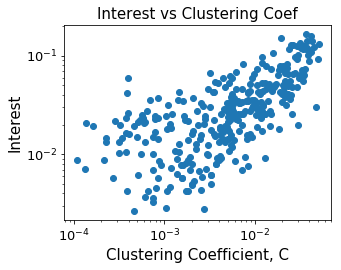

In [161]:
fig,ax = plt.subplots(figsize = FIGSIZE_ONECOL)
plt.plot(df['Interest'],df['C'], 'o')
plt.loglog()
ax.set_xscale('log')
plt.ylabel('Interest')
plt.xlabel('Clustering Coefficient, C')
plt.title('Interest vs Clustering Coef')
plt.tight_layout()

plt.savefig('./imgs/hubs_interest_corr.pdf', format='pdf')


In [153]:
df_temp = df
df_temp = df_temp.drop('id', axis = 1)
df_temp =df_temp.drop('LogInterest', axis = 1)
df_cor =df_temp.corr()
df_cor

              degree         C        cc  in_degree  out_degree  followers  \
degree      1.000000 -0.366416  0.083563   0.992172   -0.065970   0.745011   
C          -0.366416  1.000000  0.047060  -0.374973    0.323646  -0.325780   
cc          0.083563  0.047060  1.000000   0.087277    0.017048   0.085527   
in_degree   0.992172 -0.374973  0.087277   1.000000   -0.147590   0.755753   
out_degree -0.065970  0.323646  0.017048  -0.147590    1.000000  -0.249879   
followers   0.745011 -0.325780  0.085527   0.755753   -0.249879   1.000000   
friends     0.039982 -0.012340 -0.005785  -0.006268    0.685159  -0.102150   
Interest   -0.263736  0.788472  0.053650  -0.269682    0.364691  -0.324531   

             friends  Interest  
degree      0.039982 -0.263736  
C          -0.012340  0.788472  
cc         -0.005785  0.053650  
in_degree  -0.006268 -0.269682  
out_degree  0.685159  0.364691  
followers  -0.102150 -0.324531  
friends     1.000000 -0.050136  
Interest   -0.050136  1.000000  

In [155]:
df_cor.head()
Y_cor = df_cor['Interest'].sort_values()
Y_cor = Y_cor[:-1]
Y_cor.index

Index([u'followers', u'in_degree', u'degree', u'friends', u'cc', u'out_degree',
       u'C'],
      dtype='object')

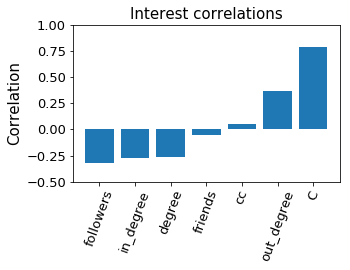

In [157]:
X_cor = range(len(Y_cor))
plt.subplots(figsize = FIGSIZE_ONECOL)
plt.bar(X_cor, Y_cor)
plt.xticks(X_cor, Y_cor.index, rotation = 70)
plt.ylim(-0.5,1)
plt.title("Interest correlations")
plt.ylabel("Correlation")
plt.tight_layout()
plt.savefig('./imgs/hubs_interest_corr_hist.pdf', format='pdf')

# Estrazione italiani

In [168]:
import collections
import networkx as nx
import numpy as np
import os
import random
from sklearn import linear_model
import json as json


In [8]:
g = nx.read_edgelist('../network/networks/edge_list.txt',
                     create_using=nx.DiGraph(), nodetype=int, data=False)

In [9]:
temp = g.nodes()
nodes = [nd for nd in temp]


In [10]:
names=[]
screen_names = []
followers = []
friends = []
users = []

for userid in tweets.find( {"lang": "it"}).sort('followers_count', pymongo.DESCENDING):
    users.append(userid)
    names.append( userid['name'] )
    screen_names.append( '@'+userid['screen_name'] )
    followers.append(userid['followers_count'])
    friends.append(userid['friends_count'])


In [11]:
user_ids_db = [u['id'] for u in users]

In [12]:
italian_users = set(nodes) & set(user_ids_db)

In [13]:
len(italian_users)

2392

In [17]:
len(names)

2464

In [23]:
g_ita = nx.subgraph(g, italian_users)

In [ ]:
##nx.write_edgelist(g_ita, '../network/networks/g_ita_edge_list.txt')

# Italian hubs

In [167]:
g_ita = nx.read_edgelist('../network/networks/g_ita_edge_list.txt',
                     create_using=nx.DiGraph(), nodetype=int, data=False)


NameError: name 'nx' is not defined